In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%pip install Prophet

Note: you may need to restart the kernel to use updated packages.


In [33]:
from prophet import Prophet

In [85]:
global_df = pd.read_csv('global_disaster_vs_temps.csv')

In [86]:
global_df.rename(columns={'disastertype_extreme temperature ':'disastertype_extreme temperature'}, inplace=True)

In [87]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       56 non-null     int64  
 1   disastertype_drought                       56 non-null     int64  
 2   disastertype_earthquake                    56 non-null     int64  
 3   disastertype_extreme temperature           56 non-null     int64  
 4   disastertype_flood                         56 non-null     int64  
 5   disastertype_landslide                     56 non-null     int64  
 6   disastertype_mass movement (dry)           56 non-null     int64  
 7   disastertype_storm                         56 non-null     int64  
 8   disastertype_volcanic activity             56 non-null     int64  
 9   LandAverageTemperature                     56 non-null     float64
 10  LandAverageTemperatureUncert

In [88]:
global_df.year = global_df.year.apply(str)

In [89]:
global_df

,year,disastertype_drought,disastertype_earthquake,disastertype_extreme temperature,disastertype_flood,disastertype_landslide,disastertype_mass movement (dry),disastertype_storm,disastertype_volcanic activity,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1960,0,7,0,2,1,0,3,1,8.583750,0.093500,14.317417,0.149417,2.932583,0.137583,15.291917,0.069333
1,1961,0,1,0,2,1,0,5,0,8.797667,0.097000,14.514917,0.165750,3.128750,0.181750,15.379917,0.067167
2,1962,0,2,0,1,0,1,3,0,8.745917,0.132917,14.540167,0.158917,3.008583,0.204417,15.325583,0.072500
3,1963,0,2,0,2,1,1,6,2,8.856000,0.092333,14.612250,0.152750,3.157583,0.182417,15.376667,0.068333
4,1964,3,6,0,10,0,0,9,1,8.409667,0.092500,14.156833,0.156333,2.768833,0.157000,15.117083,0.065167
5,1965,2,5,0,7,5,0,9,0,8.527417,0.108833,14.268417,0.184500,2.841417,0.195167,15.195750,0.067250
6,1966,3,6,1,12,3,0,15,1,8.599333,0.092250,14.325917,0.127250,2.899417,0.134083,15.264667,0.063667
7,1967,2,7,0,13,2,0,7,0,8.700083,0.083667,14.406500,0.125917,3.037083,0.151750,15.294167,0.059250
8,1968,0,12,0,11,3,0,14,1,8.516333,0.111667,14.164250,0.130583,2.857250,0.151500,15.263917,0.060167
9,1969,5,7,0,10,1,0,10,1,8.595083,0.085167,14.212083,0.151500,2.962917,0.195750,15.390500,0.055167


In [90]:
global_df.year = pd.to_datetime(global_df['year'], format='%Y')

In [91]:
#global_df.drop(columns=['year'], axis=1, inplace=True)

In [92]:
time_df = pd.DataFrame({'ds':global_df.year, 'y':global_df.LandAverageTemperature})
time_df.tail()

,ds,y
51,2011-01-01,9.516000
52,2012-01-01,9.507333
53,2013-01-01,9.606500
54,2014-01-01,9.570667
55,2015-01-01,9.831000


In [93]:
time_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [94]:
mymodel = Prophet()
mymodel.fit(time_df)

16:08:42 - cmdstanpy - INFO - Chain [1] start processing
16:08:43 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
future_data = mymodel.make_future_dataframe(periods = 30,freq='YS')
fcast = mymodel.predict(future_data)

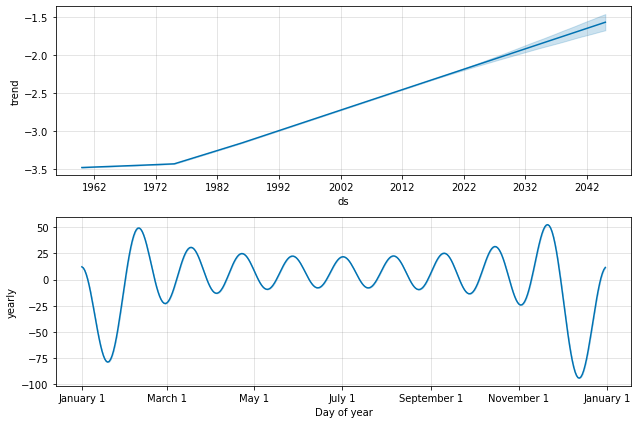

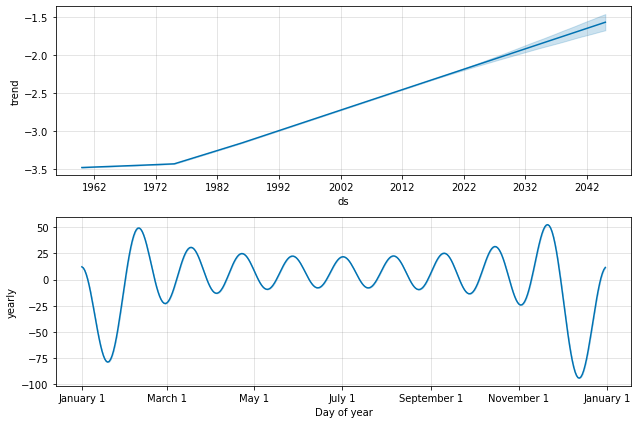

In [103]:
mymodel.plot_components(fcast)

In [108]:
fcast.tail(6)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
80,2040-01-01,-1.704887,10.078675,10.509250,-1.784087,-1.622637,12.005875,12.005875,12.005875,12.005875,12.005875,12.005875,0.0,0.0,0.0,10.300988
81,2041-01-01,-1.677919,10.221926,10.645245,-1.761279,-1.589516,12.108666,12.108666,12.108666,12.108666,12.108666,12.108666,0.0,0.0,0.0,10.430746
82,2042-01-01,-1.651026,10.308206,10.734652,-1.740767,-1.557337,12.159501,12.159501,12.159501,12.159501,12.159501,12.159501,0.0,0.0,0.0,10.508475
83,2043-01-01,-1.624132,10.291939,10.704987,-1.719302,-1.526568,12.125289,12.125289,12.125289,12.125289,12.125289,12.125289,0.0,0.0,0.0,10.501157
84,2044-01-01,-1.597238,10.186391,10.621064,-1.696748,-1.493238,12.005875,12.005875,12.005875,12.005875,12.005875,12.005875,0.0,0.0,0.0,10.408637
85,2045-01-01,-1.570271,10.319056,10.751674,-1.675810,-1.462677,12.108666,12.108666,12.108666,12.108666,12.108666,12.108666,0.0,0.0,0.0,10.538395
